## **Some important libraries used in this project**

In [33]:
# Some important libraries used in this projec pd  # Data processing and manipulation
import matplotlib.pyplot as plt  # Visualization library for creating static, animated, and interactive plots
from wordcloud import WordCloud  # Library for creating word cloud visualizations
from sklearn.pipeline import Pipeline  # Pipt
import numpy as np  # Linear algebra operations, such as array and matrix computations
import pandas as pd
from sklearn.compose import ColumnTransformer  # Applies transformations to specific columns in data
from sklearn.preprocessing import OneHotEncoder  # Converts categorical data into one-hot encoded format
import re  # Regular expressions for text processing and pattern matching
import nltk  # Natural Language Toolkit, provides tools for text preprocessing and linguistic analysis
nltk.download('stopwords')  # Downloading predefined stopwords
nltk.download('rslp')# Downloading predefinedrslp
from nltk.corpus import stopwords  # Stopwords list for filtering out common words in text
from nltk.stem.porter import PorterStemmer  # Stemming tool to reduce words to their base/root form
from sklearn.feature_extraction.text import CountVectorizer  # Converts text data into a bag-of-words representation
from nltk.tokenize import TweetTokenizer  # Tokenizes tweets or text into words while handling special cases like hashtags
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest, a robust ensemble learning classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression for binary classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.svm import SVC #SVM classifier
from sklearn.ensemble import AdaBoostClassifier #AdaBoost Classifier
from sklearn.model_selection import GridSearchCV # Grid Search CV used for decsion tree parameter find
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score  # Generate and display confusion matrices
import matplotlib.pyplot as plt  # Visualization library
import os  # Provides tools for interacting with the operating system
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


# **Load  and summary of dataset**

In [34]:
dataset = pd.read_csv('labeled_data.csv')
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [35]:
nltk.download('stopwords')  # Downloading predefined stopwords
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

# **Data Transformation and Target Extraction**

In [36]:
dt_transformed = dataset[['class', 'tweet']]
# Extract the target variable 'class' as a 1D array
y = (dt_transformed.iloc[:, :-1].values).ravel()
dt_transformed


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


# **Plot Distribution of Class Labels in the Dataset**

<ipython-input-37-a6d5b1f2094c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_transformed['class'] = dt_transformed['class'].replace({
<ipython-input-37-a6d5b1f2094c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


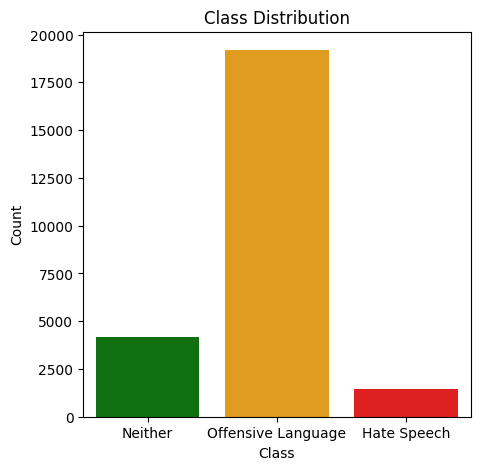

In [37]:
# Replace class labels with descriptive names
dt_transformed['class'] = dt_transformed['class'].replace({
    0: 'Hate Speech',
    1: 'Offensive Language',
    2: 'Neither'
})
# Plot the distribution of the 'class'
fig = plt.figure(figsize=(5, 5))
ax = sns.countplot(
    x='class',
    data=dt_transformed,
    palette={'Hate Speech': 'red', 'Offensive Language': 'orange', 'Neither': 'green'}
)
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()


# **Distribution of Sentiments in the Dataset**

Text(0.5, 1.0, 'Distribution of sentiments')

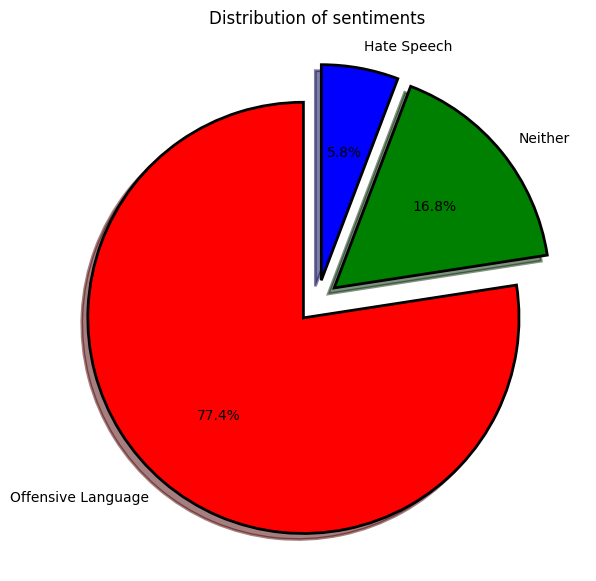

In [38]:
# Plot the distribution of the Sentiments Analysis
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = dt_transformed['class'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

# **Preprocessing Dataset**

In [39]:
def preprocessing(data):
      """
    Preprocesses text data by cleaning, normalizing, and stemming.

    Parameters
    --------------------
        data  -- list of strings, raw text data (e.g., tweets) to preprocess

    Returns
    --------------------
        corpus -- numpy array of strings
                  Preprocessed and cleaned text data, where:
                  - Mentions (@username) and URLs are removed
                  - Retweet notations (RT) are removed
                  - Non-alphabetical characters are removed
                  - Text is converted to lowercase
                  - Stopwords (except 'not') are removed
                  - Words are stemmed to their root form
                  - Words shorter than 3 characters are excluded
    """
      stemmer = nltk.stem.RSLPStemmer()
      all_stopwords = stopwords.words('english')
      all_stopwords.remove('not')
      corpus = []
      for tweet in data:
        review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
        review = re.sub('RT', ' ', review)
        review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
        review = re.sub(r"https?", " ", review)
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
        review = ' '.join(review)
        corpus.append(review)
      return np.array(corpus)

# **Text Tokenization and Vectorization**

In [40]:
tweet_tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
def tokenize(corpus, flag=0):
    """
    Tokenizes and vectorizes a given text corpus using CountVectorizer.

    Parameters
    --------------------
        corpus -- list of strings, input text data to be tokenized and vectorized
        flag   -- integer, specifies the mode of operation:
                  flag = 1: Fit and transform the training data
                  flag = 0: Transform new data using the existing vectorizer

    Returns
    --------------------
        array -- numpy array of tokenized and vectorized data
                 - Rows correspond to documents
                 - Columns correspond to the top 1010 features (words)
    """
    #flag = 1 --> treino
    if (flag):
        return vectorizer.fit_transform(corpus).toarray()
    else:
        return vectorizer.transform(corpus).toarray()
c_preprocessed = preprocessing(dt_transformed['tweet'].values)

# Create a DataFrame with two columns: 'tweet' and 'label'
data_preprocessed = pd.DataFrame({
    'tweet': c_preprocessed,
    'label': dt_transformed['class'].values
})

# **Tweet Length Distribution Analysis**

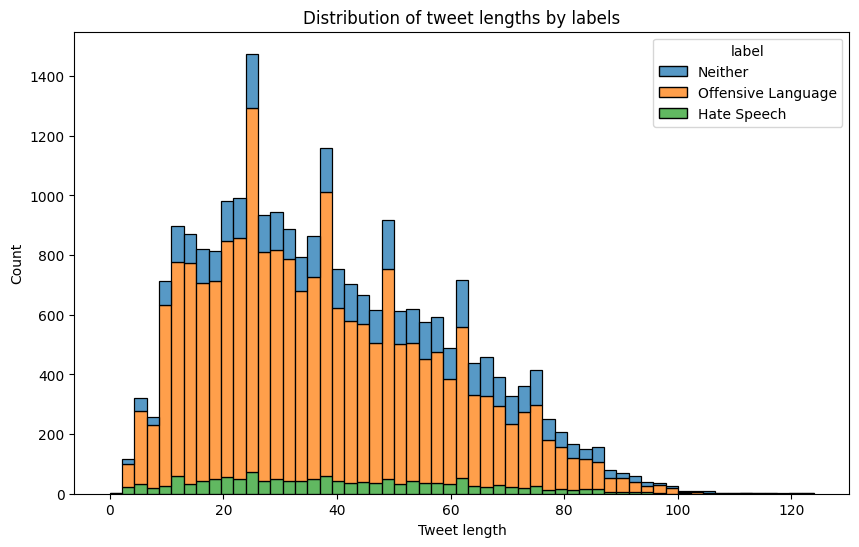

In [41]:
data_preprocessed['tweet_length'] = data_preprocessed['tweet'].apply(len)

# plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data_preprocessed, x='tweet_length', hue='label', multiple='stack')
plt.title('Distribution of tweet lengths by labels')
plt.xlabel('Tweet length')
plt.ylabel('Count')
plt.show()


In [42]:
data_preprocessed

,tweet,label,tweet_length
0,woman complain clean hous amp man alway take t...,Neither,50
1,boy dat cold tyga dwn bad cuffin dat hoe place,Offensive Language,46
2,dawg ever fuck bitch start cri confus shit,Offensive Language,42
3,look like tranni,Offensive Language,16
4,shit hear might true might faker bitch told,Offensive Language,43
...,...,...,...
24778,muthaf lie right trash mine bibl scriptur hymn,Offensive Language,46
24779,gone broke wrong heart babi drove redneck crazi,Neither,47
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language,51
24781,youu got wild bitch tellin lie,Offensive Language,30


# **Visualization of Most Frequent Words in Hate Speech Tweets**

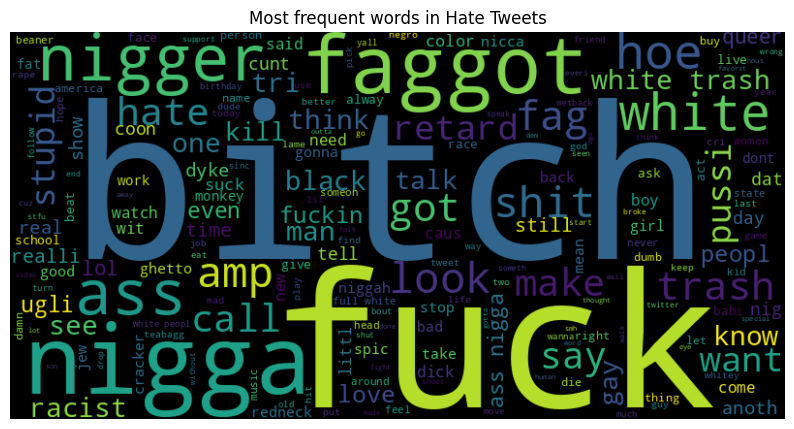

In [43]:
"""
Visualizes the most frequent words in tweets labeled as 'Hate Speech' using a word cloud.

Steps
--------------------
    1. Filters tweets labeled as 'Hate Speech' from the preprocessed dataset.
    2. Joins all the tweets into a single text string for input to the word cloud.
    3. Generates and displays a word cloud to highlight the most frequent words.

Parameters
--------------------
    data_preprocessed -- pandas DataFrame, the preprocessed dataset with tweets and their labels.

Returns
--------------------
    None -- Displays a word cloud plot showing the most frequent words in tweets labeled as 'Hate Speech'.
"""
hate_tweets = data_preprocessed[data_preprocessed.label=='Hate Speech']
hate_tweets.apply(len)
text=''.join([word for word in hate_tweets['tweet']])
plt.figure(figsize=(10,10), facecolor='None')
wordcloud=WordCloud(max_words=200, width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in Hate Tweets", fontsize=12)
plt.show()

# **Visualization of Most Frequent Words in Offensive Language Tweets**

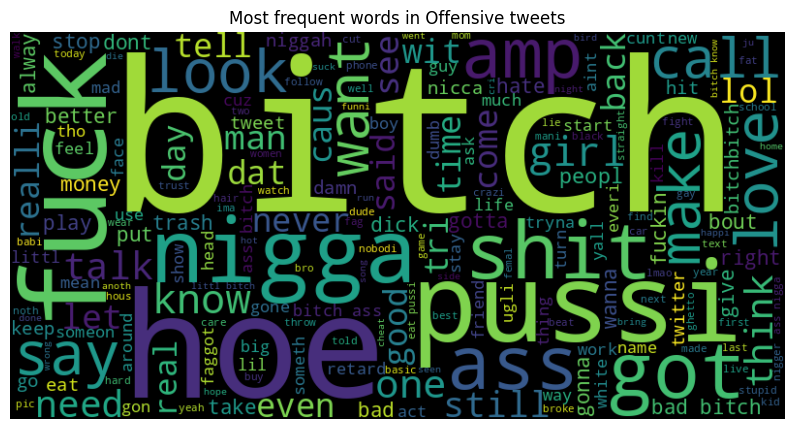

In [44]:
"""
Visualizes the most frequent words in tweets labeled as 'Offensive Language' using a word cloud.

Steps
--------------------
    1. Filters tweets labeled as 'Offensive Language' from the preprocessed dataset.
    2. Joins all the tweets into a single text string for input to the word cloud.
    3. Generates and displays a word cloud to highlight the most frequent words.

Parameters
--------------------
    data_preprocessed -- pandas DataFrame, the preprocessed dataset with tweets and their labels.

Returns
--------------------
    None -- Displays a word cloud plot showing the most frequent words in tweets labeled as 'Offensive Language'.
"""
Offensive_tweets = data_preprocessed[data_preprocessed.label=='Offensive Language']
Offensive_tweets.apply(len)
text=''.join([word for word in Offensive_tweets['tweet']])
plt.figure(figsize=(10,10), facecolor='None')
wordcloud=WordCloud(max_words=200, width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in Offensive tweets", fontsize=12)
plt.show()

# **Visualization of Most Frequent Words in Non-Hate Tweets**

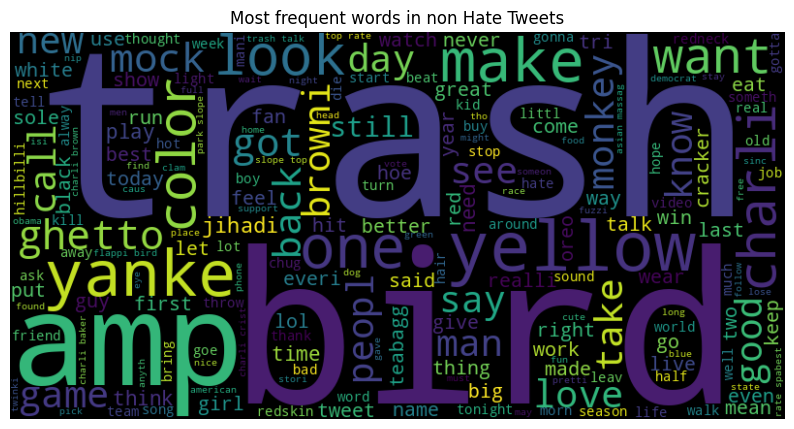

In [45]:
"""
Visualizes the most frequent words in tweets labeled as 'Neither' (non-hate tweets) using a word cloud.

Steps
--------------------
    1. Filters tweets labeled as 'Neither' from the preprocessed dataset.
    2. Joins all the tweets into a single text string for input to the word cloud.
    3. Generates and displays a word cloud to highlight the most frequent words.

Parameters
--------------------
    data_preprocessed -- pandas DataFrame, the preprocessed dataset with tweets and their labels.

Returns
--------------------
    None -- Displays a word cloud plot showing the most frequent words in tweets labeled as 'Neither'.
"""
non_hate_tweets = data_preprocessed[data_preprocessed.label=='Neither']
non_hate_tweets.apply(len)
text=''.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(10,10), facecolor='None')
wordcloud=WordCloud(max_words=200, width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in non Hate Tweets", fontsize=12)
plt.show()

# **Splits the dataset**

In [46]:
"""
Splits the dataset into training and validation sets, preprocesses the tweets, and converts them into tokenized numerical representations.

Steps
--------------------
    1. Splits the dataset into training (80%) and validation (20%) sets, ensuring stratified sampling based on the 'class' column.
    2. Preprocesses the tweets in both training and validation sets using the `preprocessing` function.
    3. Tokenizes the preprocessed tweets using the `tokenize` function:
       - For training data, fits the tokenizer and transforms the data.
       - For validation data, uses the existing tokenizer for transformation.
    4. Extracts class labels (`y_train` and `y_vad`) for both sets.

Parameters
--------------------
    dataset -- pandas DataFrame, the complete dataset containing tweets and their class labels.

Returns
--------------------
    X_train -- numpy array, tokenized feature representation for training set.
    X_vad   -- numpy array, tokenized feature representation for validation set.
    y_train -- numpy array, class labels for training set.
    y_vad   -- numpy array, class labels for validation set.
"""
df_train, df_vad = train_test_split(dataset, test_size=0.20, random_state=42, stratify=dataset['class'])
print(df_train.shape, df_vad.shape)
c_train = preprocessing(df_train['tweet'].values)
c_vad = preprocessing(df_vad['tweet'].values)
X_train = tokenize(c_train, 1)
X_vad = tokenize(c_vad, 0)
y_train = df_train['class'].values
y_vad = df_vad['class'].values
X_train.shape, X_vad.shape

(19826, 7) (4957, 7)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((19826, 1010), (4957, 1010))

# **Logistic Regression Model**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


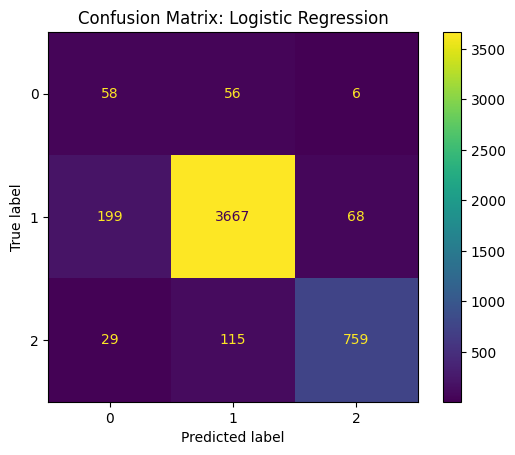

              precision    recall  f1-score   support

     class 0       0.48      0.20      0.29       286
     class 1       0.93      0.96      0.94      3838
     class 2       0.84      0.91      0.87       833

    accuracy                           0.90      4957
   macro avg       0.75      0.69      0.70      4957
weighted avg       0.89      0.90      0.89      4957

Training Accuracy: 0.92
Training Error: 0.08
Test Accuracy: 0.90
Test Error: 0.10


In [47]:
"""
Implements a logistic regression model, evaluates its performance, and visualizes the results using a confusion matrix.

Steps
--------------------
    1. Imports necessary metrics and tools for evaluation:
        - `confusion_matrix` and `ConfusionMatrixDisplay` for confusion matrix visualization.
        - `classification_report` for a detailed classification performance summary.
        - `accuracy_score` for computing the model's overall accuracy.
    2. Trains a logistic regression model using the training data.
    3. Predicts class labels for the validation dataset.
    4. Defines a helper function `set_confusion_matrix` to display the confusion matrix.
    5. Calls the helper function to visualize the confusion matrix for the logistic regression model.
    6. Prints the classification report with precision, recall, F1-score, and support for each class.
    7. Calculates and prints the overall accuracy of the model.

Parameters
--------------------
    clf          -- trained classifier
    X            -- numpy array, validation set predictions
    y            -- numpy array, true labels for the validation set
    title        -- string, title for the confusion matrix plot
    target_names -- list of strings, names of the target classes

Returns
--------------------
    None -- Displays the confusion matrix and prints the classification report and accuracy.
"""
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=0)
model.fit(X_train, y_train.ravel())
y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
training_error = 1 - training_accuracy
y_pred = model.predict(X_vad)
test_accuracy = accuracy_score(y_vad, y_pred)
test_error = 1 - test_accuracy
def set_confusion_matrix(clf, X, y, title):
    cm = confusion_matrix(y, X)  # Replace y_true and y_pred with actual values
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

set_confusion_matrix(model, y_vad, y_pred, "Confusion Matrix: Logistic Regression")
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_vad, y_pred, target_names=target_names))
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Training Error: {training_error:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Error: {test_error:.2f}")